SVM Trained Classifier Accuracy: 0.9762
Predicted Values: [3 6 8 ... 3 7 0]
Accuracy of Classifier on Validation Images: 0.9762
Confusion Matrix:
[[1009    1    4    0    0    1    3    2    2    0]
 [   0 1127    3    3    0    0    0    2    1    2]
 [   4    4 1057    2    1    1    3    6    5    1]
 [   2    0   14 1006    1   10    0    3    5    5]
 [   2    0    2    1  945    0    0    3    1    9]
 [   2    1    0    9    3  929    5    0    2    2]
 [   1    1    1    0    4    5 1071    0    2    0]
 [   1    3    6    1    7    0    0 1137    1    6]
 [   1    4    4    9    0    6    3    2  964    6]
 [   4    5    3    8    5    3    0   10    5 1005]]
Predicted Labels for Test Images: [4 4 7 ... 4 3 2]
Accuracy of Classifier on Test Images: 0.9764
Confusion Matrix for Test Data:
[[1022    0    1    0    2    3    6    0    2    0]
 [   0 1217    3    2    0    0    0    3    1    0]
 [   3    7 1018    1    3    3    1    6    4    3]
 [   2    1   11 1102    0    5   

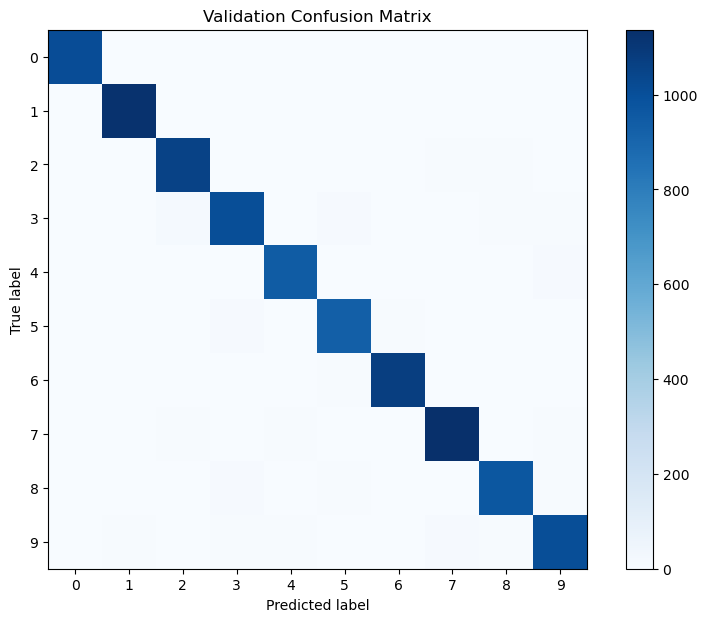

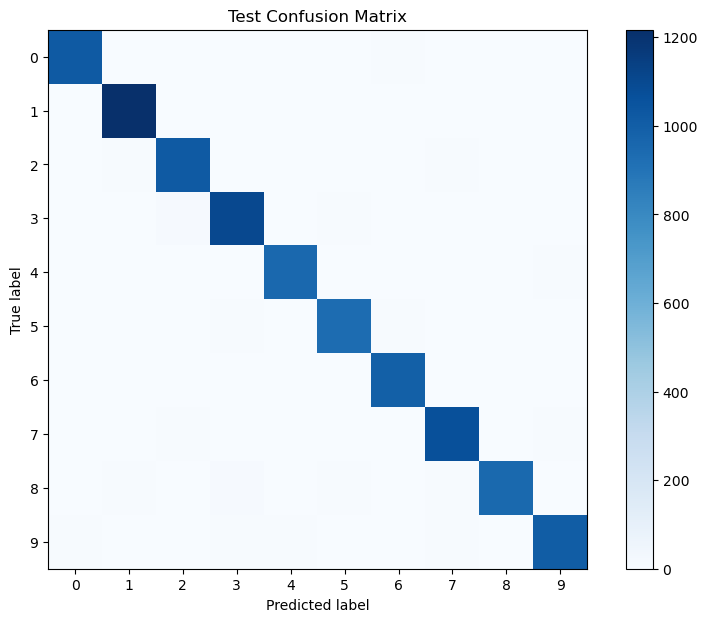

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

# Load MNIST data with updated parser parameter
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data, mnist.target.astype(np.int8)

# Convert arrays to contiguous arrays
X = np.ascontiguousarray(X)
y = np.ascontiguousarray(y)

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert split arrays to contiguous arrays
X_train = np.ascontiguousarray(X_train)
y_train = np.ascontiguousarray(y_train)
X_val = np.ascontiguousarray(X_val)
y_val = np.ascontiguousarray(y_val)
X_test = np.ascontiguousarray(X_test)
y_test = np.ascontiguousarray(y_test)

# Train SVM Classifier
svm = SVC(gamma=0.1, kernel='poly')
svm.fit(X_train, y_train)

# Pickle the classifier for future use
joblib.dump(svm, 'svm_classifier.pkl')

# Calculate accuracy on validation data
y_val_pred = svm.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_confusion_matrix = confusion_matrix(y_val, y_val_pred)

print(f"SVM Trained Classifier Accuracy: {val_accuracy:.4f}")
print(f"Predicted Values: {y_val_pred}")
print(f"Accuracy of Classifier on Validation Images: {val_accuracy:.4f}")
print("Confusion Matrix:")
print(val_confusion_matrix)

# Calculate accuracy on test data
y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Predicted Labels for Test Images: {y_test_pred}")
print(f"Accuracy of Classifier on Test Images: {test_accuracy:.4f}")
print("Confusion Matrix for Test Data:")
print(test_confusion_matrix)

# Optional: Visualizing the confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(val_confusion_matrix, 'Validation Confusion Matrix')
plot_confusion_matrix(test_confusion_matrix, 'Test Confusion Matrix')
